In [ ]:
import os
import subprocess
src= "/path"

for file in os.listdir(src):
    name = file[:file.rfind(".")]
    #ffmpeg -y -i $filename -map_metadata -1 -codec copy $newfilename
    subprocess.call(["ffmpeg","-y","-i",src+"/"+name+".wav","-map_metadata","-1","-codec","copy",src+"/"+name+".wav"])
    #subprocess.call(["fmpeg", "-i", sourcedir+"/"+name+".avi", sourcedir+"/"+name+".webm"])
    

44100
156966
(156966,)
True


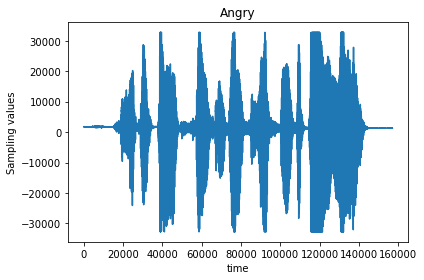

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.io.wavfile
#try:
rate, data = scipy.io.wavfile.read("Allsavee/a01 (2).wav")
#except:
    #print(data.shape)
print (rate)
print(len(data))
print(data.shape)
print(data.shape==(len(data),))
l=len(data)
s=l-100000
#data=data[s:]
#print(data.shape)

plt.plot(data)
plt.ylabel('Sampling values')
plt.xlabel('time')
plt.title('Angry')
plt.tight_layout()

44100
92447
float64
(92447,)
0.039215087890625
float64
(92447,)


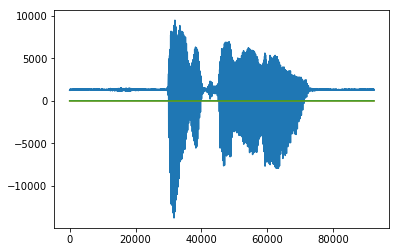

In [2]:
from numpy import array
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.io.wavfile
#filename="03-01-05-01-01-01-24.wav"
rate, data = scipy.io.wavfile.read("Allsavee/n03 (2).wav")
#emo=filename[7]
#print(emo)
plt.plot(data[:114688])
data=data/ (2.**15)
plt.plot(data[:114688])
print (rate)
print(len(data))
print(data.dtype)
print(data.shape)
data=data.tolist()
print(data[10])
#print(data)
a=array(data)
print(a.dtype)
print(a.shape)
plt.plot(data[:114688])

(92447,)


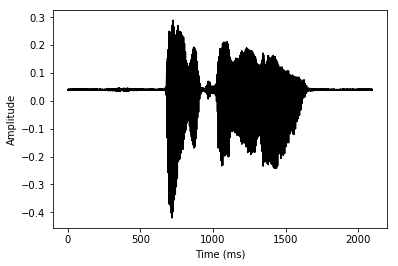

In [4]:
d=data[:]
timeArray = np.arange(0, 92447, 1)
timeArray = timeArray / rate

print(timeArray.shape)
#print(d.shape)
timeArray = timeArray * 1000  #scale to milliseconds
plt.plot(timeArray, d, color='k')
plt.ylabel('Amplitude')
plt.xlabel('Time (ms)')

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.io.wavfile

import os
path="Allsavee"
n=114688
arr = np.empty(shape=(0,n))
for filename in os.listdir(path):
    
    rate, data = scipy.io.wavfile.read("Allsavee/"+filename)
    if data.shape[0]==n:
        arr=np.append(arr,[data],axis=0)
    else:
        print(filename)
print(len(arr))

In [17]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.io.wavfile
from numpy import array
import os

path="Allsavee/"
e=[]
arr=[]
app=np.zeros([100000, 960])
i=0
for filename in os.listdir(path):
    nam=filename[0]
    if nam=='a':
        emo=1
    elif nam=='d':
        emo=2
    elif nam=='f':
        emo=3
    elif nam=='h':
        emo=4
    elif nam=='n':
        emo=5
    elif nam=='s':
        if filename[1]=='a':
            emo=6
        else:
            emo=7
    try:
        rate, data = scipy.io.wavfile.read("Allsavee/"+filename)
    except:
        print(filename)
    
    if len(data) < 100000:
        l=len(data)
        l=100000-l
        for k in range(0,l):
            data=np.append(data,0)
        
    elif len(data)<140000 and len(data)>100000:
        l=len(data)
        s=l-100000
        data=data[s:]
    else:
        data = data[40000:140000]
        for j in range(0,100000):
            app[j][i]=data[j]
    #data=data.tolist()
    arr.append(data)
    e.append(emo)
    i=i+1
        
print(len(app))
#a=array(arr)
#print(a.dtype)
#print(a.shape)

100000


In [18]:
capp=app
capp=np.transpose(capp)
print(capp.shape)
e=array(e)
print(e.shape)
print(e[0])

(960, 100000)
(960,)
1


In [ ]:
#from sklearn import preprocessing
#capp = preprocessing.normalize(capp)

In [19]:
import sklearn
from keras.utils import to_categorical
labels = []
for i in range(0,960):
    lab=to_categorical(e[i], 8)
    lab=lab[1:]
    labels.append(lab)

In [20]:
print(np.shape(lab))

(7,)


In [21]:
capp = capp.reshape(960, 10, 10000)
print(capp.shape)
print(capp.dtype)
print(capp[90][0][58])
labels=array(labels)
print(labels.shape)


(960, 10, 10000)
float64
-5505.0
(960, 7)


In [83]:
from random import shuffle
ind_list = [i for i in range(960)]
shuffle(ind_list)
train_new  = capp[ind_list,:,:]
target_new = labels[ind_list,]

In [91]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import keras
modelser = Sequential()

#LSTM Layer1
modelser.add(LSTM(300, return_sequences=True, input_shape=(10, 10000)))     # returns a sequence of vectors of dimension 256
modelser.add(Dropout(0.2))
#modelser.add(Dense(64, activation='relu'))
#modelser.add(Dense(128, activation='relu'))
#LSTM Layer2
modelser.add(LSTM(200, return_sequences=True))               # returns a sequence of vectors of dimension 128
modelser.add(Dropout(0.3))
#LSTM Layer3
modelser.add(LSTM(100))                           # return a single vector of dimension 64

#hidden layer
modelser.add(Dense(64, activation='relu'))
#modelser.add(Dropout(0.3))
#Output layer
modelser.add(Dense(7, activation='softmax'))

modelser.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.RMSprop(), metrics=['accuracy'])

hist = modelser.fit(train_new, target_new, batch_size=64, epochs=40, verbose=1, validation_split=0.1 )

Train on 864 samples, validate on 96 samples
Epoch 1/40
864/864 [==============================] - 53s 61ms/step - loss: 1.9101 - acc: 0.2257 - val_loss: 1.7867 - val_acc: 0.2396
Epoch 2/40
864/864 [==============================] - 22s 25ms/step - loss: 1.7841 - acc: 0.2812 - val_loss: 1.7448 - val_acc: 0.3438
Epoch 3/40
864/864 [==============================] - 21s 24ms/step - loss: 1.6764 - acc: 0.3264 - val_loss: 1.6966 - val_acc: 0.3750
Epoch 4/40
864/864 [==============================] - 21s 24ms/step - loss: 1.6259 - acc: 0.3646 - val_loss: 1.5686 - val_acc: 0.3958
Epoch 5/40
864/864 [==============================] - 21s 24ms/step - loss: 1.5607 - acc: 0.4120 - val_loss: 1.5013 - val_acc: 0.4271
Epoch 6/40
864/864 [==============================] - 21s 24ms/step - loss: 1.4305 - acc: 0.4468 - val_loss: 1.5075 - val_acc: 0.4583
Epoch 7/40
864/864 [==============================] - 22s 25ms/step - loss: 1.3470 - acc: 0.4769 - val_loss: 1.5354 - val_acc: 0.4688
Epoch 8/40
864/86

In [87]:
# serialize model to JSON
modelser_json = modelser.to_json()
with open("modelser.json", "w") as json_file:
    json_file.write(modelser_json)
# serialize weights to HDF5
modelser.save_weights("modelser.h5")
print("Saved model to disk")

Saved model to disk


In [1]:
from keras.models import model_from_json
# load json and create model
json_file = open('modelser.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("modelser.h5")
print("Loaded model from disk")

Using TensorFlow backend.


Loaded model from disk


In [8]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.io.wavfile
rate, data = scipy.io.wavfile.read("RECORDING.wav")
print (rate)
print(len(data))
print(data[0])
new=[]
for b in data:
    b=max(b[0],b[1])
    new.append(b)
print(len(new))  

44100
294912
[-2114 -1219]
294912


In [9]:
new=np.array(new)
print(new.shape)


(294912,)


In [10]:
l=len(new)
c=int(l/100000)
left=len(new)-(c*100000)
rec=[]
i=0
for i in range(0,c):
    rec.append(new[100000*i:100000*(i+1)])

if left>=70000:
    j=new[(c*100000):(c*100000)+left]
    l=len(j)
    l=100000-l
    for k in range(0,l):
        j=np.append(j,new[(c*100000)+k])
    c=c+1
rec.append(j)
rec=np.array(rec)    
print(rec.shape)
summ=np.zeros([7])
for i in range(0,c):
    find=rec[i]
    find=find.reshape(1,10,10000)
    custom = loaded_model.predict(find)
    percent_emot = custom[0]
    output_emot = custom[0].tolist()
    for k in range(0,7):
        summ[k]=summ[k]+(output_emot[k])
    
    disp_output = "Probability assigned to each emotion class as percentage:" + "\n\nNeutral: "+ str(output_emot[0]*100)+ "\n\nCalm: "+ str(output_emot[1]*100)+ "\n\nHappy: "+ str(output_emot[2]*100)+ "\n\nSad: "+ str(output_emot[3]*100) + "\n\nAngry: "+ str(output_emot[4]*100) + "\n\nFearful: "+ str(output_emot[5]*100) + "\n\nDisgust: " +str(output_emot[6]*100 ) 
    print(disp_output)
for k in range(0,7):
    summ[k]=summ[k]/c
print(summ)
disp = "Probability assigned to each emotion class as percentage:" + "\n\nNeutral: "+ str(summ[0]*100)+ "\n\nCalm: "+ str(summ[1]*100)+ "\n\nHappy: "+ str(summ[2]*100)+ "\n\nSad: "+ str(summ[3]*100) + "\n\nAngry: "+ str(summ[4]*100) + "\n\nFearful: "+ str(summ[5]*100) + "\n\nDisgust: " +str(summ[6]*100 ) 
print(disp)

(3, 100000)
Probability assigned to each emotion class as percentage:

Neutral: 0.07466383976861835

Calm: 0.8208116516470909

Happy: 84.63996052742004

Sad: 0.5232257768511772

Angry: 0.05462809349410236

Fearful: 0.3698393702507019

Disgust: 13.51686418056488
Probability assigned to each emotion class as percentage:

Neutral: 0.00865546753630042

Calm: 0.006713662878610194

Happy: 0.03803638101089746

Sad: 99.90649819374084

Angry: 0.02419816592009738

Fearful: 0.0003775223831326002

Disgust: 0.015521218301728368
Probability assigned to each emotion class as percentage:

Neutral: 99.7978150844574

Calm: 0.011178422573721036

Happy: 0.09203832014463842

Sad: 0.08056797087192535

Angry: 3.9629452430745005e-05

Fearful: 0.00015808257103344658

Disgust: 0.018214655574411154
[3.32937115e-01 2.79567912e-03 2.82566784e-01 3.35034306e-01
 2.62886296e-04 1.23458325e-03 4.51686668e-02]
Probability assigned to each emotion class as percentage:

Neutral: 33.29371146392077

Calm: 0.27956791236647

In [44]:
#X_test = train_new()
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import keras
loaded_model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
loaded_model.fit(train_new,target_new)
y_pred =loaded_model.predict(train_new)

Epoch 1/1
960/960 [==============================] - 125s 130ms/step - loss: 0.7401 - acc: 0.7219


In [46]:
from sklearn.metrics import classification_report, confusion_matrix
pred_list = []; actual_list = []
predictions = loaded_model.predict(train_new)
for i in predictions:
    pred_list.append(np.argmax(i))
for i in target_new:
    actual_list.append(np.argmax(i))
cnf_matrix=confusion_matrix(actual_list, pred_list)

In [48]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

class_names =['angry','disgust','fear','happy','neutral','surprise','sad']
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[ 80   0   0   0  40   0   0]
 [  0  76   0   0  44   0   0]
 [  0   2  78   0  40   0   0]
 [  0   0   0  86  34   0   0]
 [  0   2   0   0 238   0   0]
 [  0   0   0   0  50  70   0]
 [  0   0   0   0  36   0  84]]


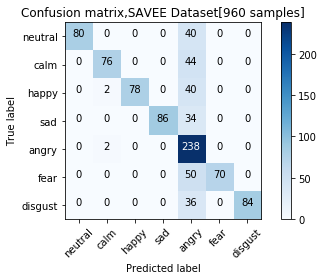

In [50]:
class_names =['neutral','calm','happy','sad','angry','fear','disgust']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix,SAVEE Dataset[960 samples]')
plt.show()

In [88]:
print(hist.history.keys())


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


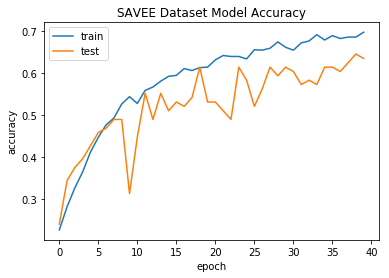

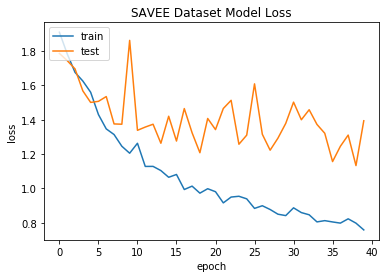

In [92]:
# summarize history for accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('SAVEE Dataset Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('SAVEE Dataset Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.io.wavfile
from numpy import array
import os

path="C:/Users/DELL/Psychometric Analysis/testfiles/"
e=[]
arr=[]
app=np.zeros([60000, 32])
i=0
for filename in os.listdir(path):
    emo=int(filename[7])
    rate, data = scipy.io.wavfile.read("C:/Users/DELL/Psychometric Analysis/testfiles/"+filename)
    if data.shape[0]==n:
        e.append(emo)
        data = data[54688:]
        for j in range(0,60000):
            app[j][i]=data[j]
        data=data.tolist()
        arr.append(data)
    else:
        print(filename)
    i=i+1
print(len(arr))
a=array(arr)
x_test=app
x_test=np.transpose(x_test)
e=array(e)
import sklearn
from keras.utils import to_categorical
y_test = []
for i in range(0,32):
    lab=to_categorical(e[i], 9)
    lab=lab[1:]
    y_test.append(lab)
x_test = x_test.reshape(32, 75, 800)
y_test=array(y_test)

In [ ]:

# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
score = loaded_model.evaluate(x_test, np.array(y_test), verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', 100*score[1])

In [ ]:
custom = loaded_model.predict(new)
percent_emot = custom[0]
print(custom[0])
output_emot = custom[0].tolist();
disp_output = "Probability assigned to each emotion class as percentage:" + "\n\nNeutral: "+ str(output_emot[0]*100)+ "\n\nCalm: "+ str(output_emot[1]*100)+ "\n\nHappy: "+ str(output_emot[2]*100)+ "\n\nSad: "+ str(output_emot[3]*100) + "\n\nAngry: "+ str(output_emot[4]*100) + "\n\nFearful: "+ str(output_emot[5]*100) + "\n\nDisgust: " +str(output_emot[6]*100 )+"\n\nSurprised: " + str(output_emot[7]*100) 
print(disp_output)               

In [ ]:
import keras
import keras.utils
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Embedding
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(32,activation='sigmoid',batch_input_shape=(1435,1,60000)))
model.add(Dense(9))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
model.fit(capp, labels, epochs=5, batch_size=1, verbose=1)

In [ ]:
score = model.evaluate(X_test, Y_test, batch_size=16)